<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий на hh.ru
   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [2]:
data = pd.read_csv('dst-3.0_16_1_hh_database.csv', sep=';')

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [26]:
data.head()

,ЗП,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),...,частичная занятость,проектная работа,полная занятость,стажировка,волонтерство,гибкий график,полный день,сменный график,вахтовый метод,удаленная работа
0,29000 руб.,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,Неоконченное высшее,М,39,202.0,...,True,True,True,False,False,True,True,True,True,True
1,40000 руб.,Технический писатель,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,Высшее,М,60,233.0,...,True,True,True,False,False,True,True,True,False,True
2,20000 руб.,Оператор,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,Среднее специальное,Ж,36,123.0,...,False,False,True,False,False,False,True,False,False,False
3,100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,Высшее,М,38,225.0,...,True,True,True,False,False,True,False,False,False,True
4,140000 руб.,Региональный менеджер по продажам,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,Высшее,Ж,26,67.0,...,False,False,True,False,False,False,True,False,False,False


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ЗП                               44744 non-null  object 
 1   Ищет работу на должность:        44744 non-null  object 
 2   Последнее/нынешнее место работы  44743 non-null  object 
 3   Последняя/нынешняя должность     44742 non-null  object 
 4   Обновление резюме                44744 non-null  object 
 5   Авто                             44744 non-null  object 
 6   Образование                      44744 non-null  object 
 7   Пол                              44744 non-null  object 
 8   Возраст                          44744 non-null  int64  
 9   Опыт работы (месяц)              44574 non-null  float64
 10  Город                            44744 non-null  object 
 11  Готовность к переезду            44744 non-null  bool   
 12  Готовность к коман

5. Выведите основную статистическую информацию о столбцах.


In [3]:
data.describe(include=['object'])

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [3]:
def get_level_education(education_and_university):

    exclude_list = ['Неоконченное высшее', 'Среднее специальное']
    education_and_university_list = education_and_university.split(' ')
    education_type = education_and_university_list[0] + ' ' + education_and_university_list[1]

    if education_type in exclude_list:
        return education_type
    else:
        education_type = education_and_university_list[0]

    return education_type

data['Образование'] = data['Образование и ВУЗ'].apply(get_level_education)
data['Образование'].unique()   # проверили что уникальные значения правильные

data.drop(['Образование и ВУЗ'],axis=1,inplace=True)

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [4]:
data['Пол'] = data['Пол, возраст'].apply(lambda x: 'Ж' if 'Женщина' in x else 'М')
data['Возраст'] = data['Пол, возраст'].apply(lambda x: (str(x).split())[2])
data['Возраст'] = data['Возраст'].astype('int64')
data.drop(['Пол, возраст'],axis=1,inplace=True)

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [5]:
def get_experience(experience_str):

    experience_list = str(experience_str).split(' ')
    year_var = ['год', 'года', 'лет']
    month_var = ['месяц', 'месяцев', 'месяца']

    if len(experience_list) >= 6:
        if experience_list[3] in year_var and experience_list[5] in month_var:
            return (int(experience_list[2]) * 12) + int(experience_list[4])
        elif experience_list[3] in year_var and experience_list[5] not in month_var:
            return int(experience_list[2]) * 12
        elif experience_list[3] in month_var:
            return int(experience_list[2])
    else: return np.NaN


data['Опыт работы (месяц)'] = data['Опыт работы'].apply(get_experience)
data.drop(['Опыт работы'],axis=1,inplace=True)

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [6]:
def get_city(data_str):

    data_list = data_str.split(' , ')
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград' ]

    if data_list[0] in 'Москва':
        return 'Москва'
    elif data_list[0] in 'Санкт-Петербург':
        return 'Санкт-Петербург'
    elif data_list[0] in million_cities:
        return 'город-миллионник'
    else: return 'другие'

def get_moving_bool(data_str):

    data_list = sep_and_clear_metro(data_str)

    if 'не готов' in data_list[1]:
        return False
    else: return True

def get_business_trips_bool(data_str):

    data_list = sep_and_clear_metro(data_str)

    if len(data_list) < 3:
        return  False
    elif 'не готов' in data_list[2]:
        return  False
    else: return True

def sep_and_clear_metro(data_str):

    data_list = data_str.split(' , ')

    if 'м.' in data_list[1]:
        del data_list[1]

    return data_list

data['Город'] = data['Город, переезд, командировки'].apply(get_city)
data['Готовность к переезду'] = data['Город, переезд, командировки'].apply(get_moving_bool)
data['Готовность к командировкам'] = data['Город, переезд, командировки'].apply(get_business_trips_bool)
data.drop(['Город, переезд, командировки'],axis=1,inplace=True)

5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [7]:
def get_columns(parent_column_name):

    columns = []

    for index in range(data[parent_column_name].count()):
        child_columns_name = (data[parent_column_name][index]).split(', ')

        for column in child_columns_name:

            if column not in columns:
                columns.append(column)

    return columns


def get_data_frame(parent_columns_list):

    for parent_name in parent_columns_list:

        columns = get_columns(parent_name)

        for value in columns:
            data[value] = data[parent_name].apply(lambda x: True if value in x else False)


get_data_frame(['Занятость', 'График'])

data.drop(['Занятость', 'График'],axis=1,inplace=True)

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [8]:
exchange_rate_df = pd.read_csv('ExchangeRates.csv', sep=';')

def get_currency_iso(salary):

    currency = salary.split(' ')[1]

    if 'бел.руб.' in currency:
        return 'BYN'
    elif 'грн.' in currency:
        return 'UAH'
    elif 'сум' in currency:
        return 'UZS'
    elif 'руб.' in currency:
        return 'RUB'
    else: return currency


columns = exchange_rate_df.columns[0].split(',')

for column in range(len(columns)):
    exchange_rate_df[columns[column]] = exchange_rate_df['currency,per,date,time,close,vol,proportion'].apply(
                                        lambda x: x.split(',')[column])

exchange_rate_df['date'] = pd.to_datetime(exchange_rate_df['date'], dayfirst=True)
exchange_rate_df.drop(['currency,per,date,time,close,vol,proportion', 'per', 'time', 'vol'],axis=1,inplace=True)
data['Обновление резюме'] = pd.to_datetime(data['Обновление резюме'], dayfirst=True).dt.date

data['Сумма'] = data['ЗП'].apply(lambda x: int(x.split(' ')[0]))
data['currency'] = data['ЗП'].apply(get_currency_iso)
data['date'] = data['Обновление резюме'].astype('datetime64')

data = pd.merge(data, exchange_rate_df, how="left", on=["currency", "date"])

data['close'] = (data['close'].fillna(1)).astype('float64')
data['proportion'] = (data['proportion'].fillna(1)).astype('int64')
data['ЗП (руб)'] = round((data['close'] / data['proportion'] * data['Сумма']), 2)
# 'date' удалила потому что дублирует 'Обновление резюме'
data.drop(['ЗП', 'Сумма', 'date'],axis=1,inplace=True)

data

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,волонтерство,гибкий график,полный день,сменный график,вахтовый метод,удаленная работа,currency,close,proportion,ЗП (руб)
0,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,2019-04-16,Имеется собственный автомобиль,Неоконченное высшее,М,39,202.0,другие,...,False,True,True,True,True,True,RUB,1.0,1,29000.0
1,Технический писатель,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",2019-04-12,Не указано,Высшее,М,60,233.0,другие,...,False,True,True,True,False,True,RUB,1.0,1,40000.0
2,Оператор,ПАО Сбербанк,Кассир-операционист,2019-04-16,Не указано,Среднее специальное,Ж,36,123.0,другие,...,False,False,True,False,False,False,RUB,1.0,1,20000.0
3,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,OpenSoft,Инженер-программист,2019-04-08,Не указано,Высшее,М,38,225.0,другие,...,False,True,False,False,False,True,RUB,1.0,1,100000.0
4,Региональный менеджер по продажам,Мармелад,Менеджер по продажам,2019-04-22,Не указано,Высшее,Ж,26,67.0,Москва,...,False,False,True,False,False,False,RUB,1.0,1,140000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44739,"Финансист, аналитик, экономист, бухгалтер, мен...","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,2019-04-22,Не указано,Высшее,М,30,91.0,другие,...,False,False,True,False,False,True,RUB,1.0,1,50000.0
44740,"Системный администратор, IT-специалист",ИП Пестрецов,Предприниматель,2019-04-22,Не указано,Высшее,М,27,84.0,другие,...,False,True,True,True,False,True,RUB,1.0,1,39000.0
44741,"Аналитик данных, Математик","ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,2019-04-09,Не указано,Высшее,Ж,48,257.0,город-миллионник,...,False,False,True,False,False,True,RUB,1.0,1,40000.0
44742,Контент-менеджер,IQ-Maxima,Менеджер проектов,2019-04-26,Имеется собственный автомобиль,Высшее,М,24,46.0,другие,...,False,False,False,False,False,True,RUB,1.0,1,20000.0


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

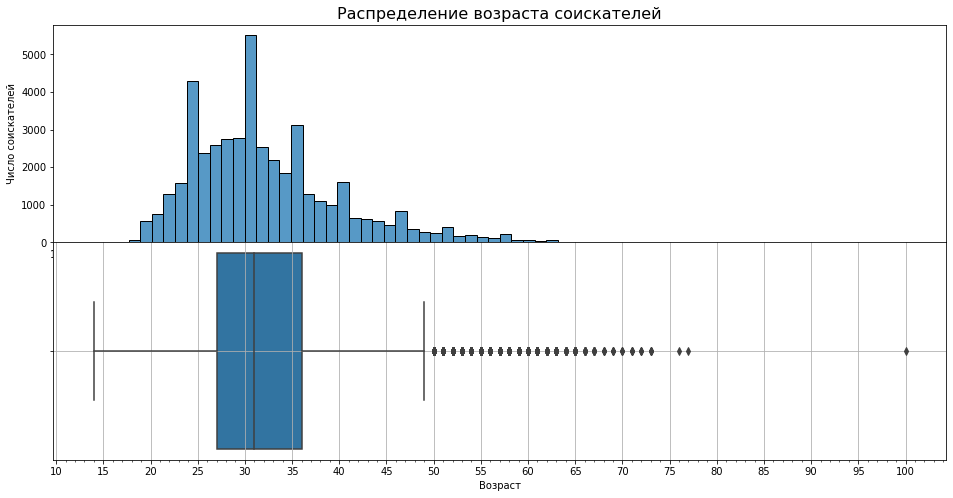

In [9]:

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))
plt.subplots_adjust(hspace=.0)

histplot1 = sns.histplot(
    data=data,
    x='Возраст',
    bins=70,
    ax=axes[0],
)
histplot1.set_title('Распределение возраста соискателей', fontsize=16)
histplot1.set_xlabel('Возраст')
histplot1.set_ylabel('Число соискателей')

histplot1.xaxis.set_major_locator(ticker.MultipleLocator(5))
histplot1.xaxis.set_minor_locator(ticker.MultipleLocator(1))

boxplot = sns.boxplot(
    data=data,
    x='Возраст',
    orient='h',
    width=0.9,
    ax=axes[1],
)
boxplot.set_xlabel('Возраст')
boxplot.grid()
boxplot.xaxis.set_major_locator(ticker.MultipleLocator(5))
boxplot.xaxis.set_minor_locator(ticker.MultipleLocator(1))

1 Мода распределения возраста равна ~ 31 году
2 Предельные значения признака 14 и 100
3 Интервал возраста большинства соискателей находится в диапазоне примерно от 26,5 до 36
4 Аномалии для признака возраста есть, я бы отсеяла все значения, которые выходят за границы полутораквантильного размаха, то есть все значения больше 49 или меньше 14 (таких нет).

3. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

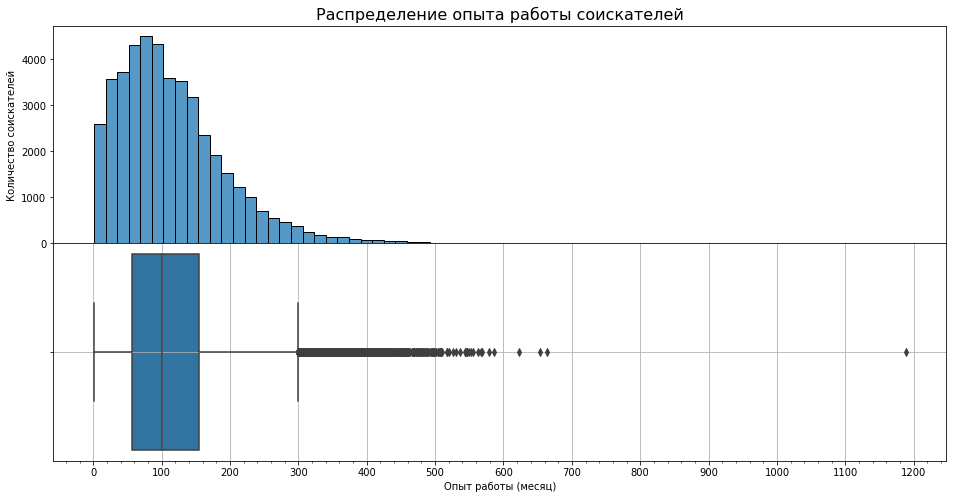

In [10]:

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))
plt.subplots_adjust(hspace=.0)

histplot = sns.histplot(
    data=data,
    x='Опыт работы (месяц)',
    bins=70,
    ax=axes[0],
)
histplot.set_title('Распределение опыта работы соискателей', fontsize=16)
histplot.set_xlabel('Опыт работы (месяц)')
histplot.set_ylabel('Количество соискателей')

histplot.xaxis.set_major_locator(ticker.MultipleLocator(100))
histplot.xaxis.set_minor_locator(ticker.MultipleLocator(20))

boxplot = sns.boxplot(
    data=data,
    x='Опыт работы (месяц)',
    orient='h',
    width=0.9,
    ax=axes[1],
)
boxplot.set_xlabel('Опыт работы (месяц)')
boxplot.grid()
boxplot.xaxis.set_major_locator(ticker.MultipleLocator(100))
boxplot.xaxis.set_minor_locator(ticker.MultipleLocator(20))

1 Мода распределения опыта работы равна ~ 100 месяцам
2 Предельные значения признака 1 и 1188
3 Интервал опыта работы большинства соискателей находится в диапазоне примерно от 60 до 160 месяцев
4 Аномалии для признака опыта работы есть, я бы отсеяла все значения, которые выходят за границы полутораквантильного размаха, то есть все значения больше 300 или меньше 0 (таких нет).

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака ЗП? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


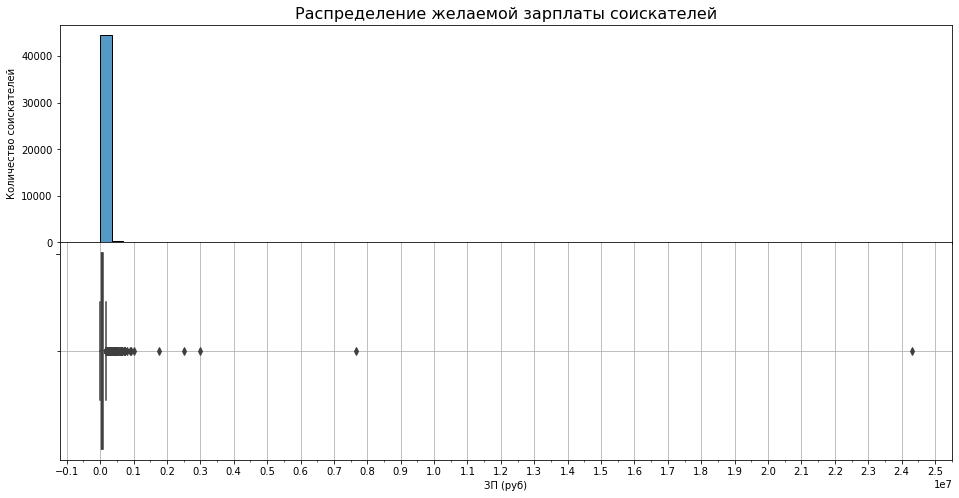

In [28]:

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))
plt.subplots_adjust(hspace=.0)

histplot = sns.histplot(
    data=data,
    x='ЗП (руб)',
    bins=70,
    ax=axes[0],
)
histplot.set_title('Распределение желаемой зарплаты соискателей', fontsize=16)
histplot.set_xlabel('ЗП (руб)')
histplot.set_ylabel('Количество соискателей')

histplot.xaxis.set_major_locator(ticker.MultipleLocator(1000000))
histplot.xaxis.set_minor_locator(ticker.MultipleLocator(500000))

boxplot = sns.boxplot(
    data=data,
    x='ЗП (руб)',
    orient='h',
    width=0.9,
    ax=axes[1],
)
boxplot.set_xlabel('ЗП (руб)')
boxplot.grid()
boxplot.xaxis.set_major_locator(ticker.MultipleLocator(1000000))
boxplot.xaxis.set_minor_locator(ticker.MultipleLocator(500000))

In [27]:
data.describe().loc[:, ['ЗП (руб)']]
# data[data['ЗП (руб)'] == 1]

,ЗП (руб)
count,4.474400e+04
mean,7.653354e+04
std,1.359315e+05
min,1.000000e+00
25%,3.708220e+04
50%,5.901900e+04
75%,9.500000e+04
max,2.430488e+07


1 Предельные значения признака желаемой ЗП соискателей 1 и 24304876
2 Примерный интервал желаемой ЗП большинства соискателей находится в диапазоне 37000 и 95000
3 Аномалии точно есть. Например, максимальное значение признака.


4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

In [ ]:
# ваш код здесь

ваши выводы здесь

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

In [ ]:
# ваш код здесь

ваши выводы здесь

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [ ]:
# ваш код здесь

In [ ]:
# ваши выводы здесь

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

In [ ]:
# ваш код здесь

ваши выводы здесь

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

In [ ]:
# ваш код здесь

ваши выводы здесь

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


In [ ]:
# ваш код здесь

ваши выводы здесь

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [ ]:
# ваш код здесь

2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [ ]:
# ваш код здесь

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [ ]:
# ваш код здесь

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [ ]:
# ваш код здесь

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [12]:
# ваш код здесь

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

In [ ]:
# ваш код здесь

ваш коммментарий здесь